In [3]:
import keras
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = tfds.load('bee_dataset', split=['train'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/7490 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0.incomplete5J1D9N/bee_dataset-train.tfrecord*…

Dataset bee_dataset downloaded and prepared to ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0. Subsequent calls will reuse this data.


In [5]:
# Split between training data, validation data, test data
splitSize = (0.0, 0.765, 0.9, 1.0)

array = np.vstack(list(tfds.as_numpy(dataset[0])))

ranges = list([int(array.shape[0] * x) for x in splitSize])

def getDataset(ranges, idx):
    return (
        np.array(list(map(lambda x: x[0][:, :, 0], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['cooling_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['pollen_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['varroa_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['wasps_output'], array[ranges[idx]: ranges[idx + 1]])))
    )

# 0 - train, 1 - validation, 2 - test

# wszystkie dane na raz (z 4 parametrow robimy wektory czteroelementowe)
labels_all = [None] * 3
images = [None] *3 
for i in range(3):
    helper = getDataset(ranges, i)
    images[i] = helper[0]
    labels_all[i] = np.column_stack((helper[1], helper[2], helper[3], helper[4]))

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [3]:
_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(32, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(62, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='tanh')(x)
_output = layers.Dense(4)(x)


model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=30)

print(max(history_all.history['accuracy']))

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Epoch 1/30
180/180 [==============================] - 21s 61ms/step - loss: 0.7823 - accuracy: 0.3699 - val_loss: 0.7649 - val_accuracy: 0.3992
Epoch 2/30
180/180 [==============================] - 10s 58ms/step - loss: 0.7016 - accuracy: 0.4676 - val_loss: 0.8044 - val_accuracy: 0.5741
Epoch 3/30
180/180 [==============================] - 10s 57ms/step - loss: 0.6175 - accuracy: 0.5120 - val_loss: 0.6716 - val_accuracy: 0.6512
Epoch 4/30
180/180 [==============================] - 10s 57ms/step - loss: 0.5606 - accuracy: 0.5247 - val_loss: 0.6253 - val_accuracy: 0.3291
Epoch 5/30
180/180 [==============================] - 10s 58ms/step - loss: 0.5220 - accuracy: 0.5282 - val_loss: 0.5529 - val_accuracy: 0.4694
Epoch 6/30
180/180 [==============================] - 10s 58ms/step - loss: 0.4904 - accuracy: 0.5348 - val_loss: 0.5453 - val_accuracy: 0.3893
Epoch 7/30
180/180 [==============================] - 10s 58ms/step - loss: 0.4644 - accuracy: 0.5355 - val_loss: 0.5071 - val_accuracy:

In [4]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 27ms/step - loss: 0.3410 - accuracy: 0.5554


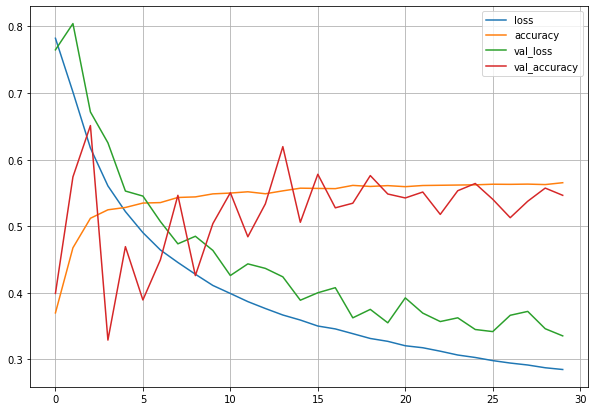

In [6]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [22]:
_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(64, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='tanh')(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=30)

print(max(history_all.history['accuracy']))

Epoch 1/30
180/180 [==============================] - 17s 91ms/step - loss: 0.7901 - accuracy: 0.3037 - val_loss: 0.9222 - val_accuracy: 0.5741
Epoch 2/30
180/180 [==============================] - 16s 91ms/step - loss: 0.7372 - accuracy: 0.3899 - val_loss: 0.7152 - val_accuracy: 0.5721
Epoch 3/30
180/180 [==============================] - 16s 91ms/step - loss: 0.6499 - accuracy: 0.4575 - val_loss: 0.6812 - val_accuracy: 0.2589
Epoch 4/30
180/180 [==============================] - 16s 90ms/step - loss: 0.5615 - accuracy: 0.5090 - val_loss: 0.5601 - val_accuracy: 0.4822
Epoch 5/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4955 - accuracy: 0.5184 - val_loss: 0.5035 - val_accuracy: 0.5524
Epoch 6/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4482 - accuracy: 0.5329 - val_loss: 0.4814 - val_accuracy: 0.4200
Epoch 7/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4119 - accuracy: 0.5458 - val_loss: 0.4213 - val_accuracy:

In [23]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 39ms/step - loss: 0.3007 - accuracy: 0.5701


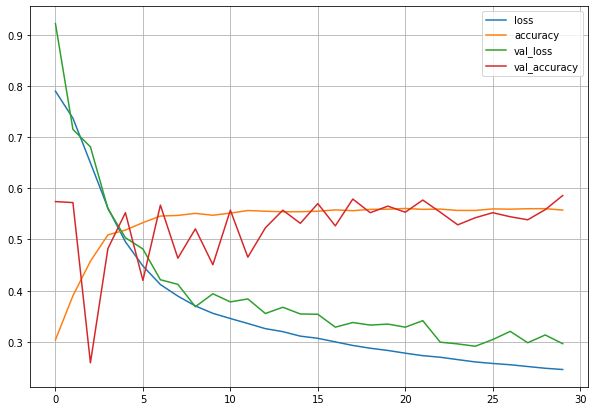

In [24]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [22]:
from keras.preprocessing.image import ImageDataGenerator

_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(64, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
_output = layers.Dense(4)(x)

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, 
                         horizontal_flip=True, fill_mode="nearest")
#aug.flow

model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_all = model_all.fit(images[0], labels_all[0], batch_size=32,
                          validation_data=(images[1], labels_all[1]), 
                          validation_steps=images[1].shape[0]//32,
                          epochs=20)

#history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]),batch_size=32, epochs=20)

print(max(history_all.history['accuracy']))

Epoch 1/20
179/179 [==============================] - 23s 75ms/step - loss: 0.7966 - accuracy: 0.2304 - val_loss: 0.7913 - val_accuracy: 0.1845
Epoch 2/20
179/179 [==============================] - 14s 74ms/step - loss: 0.7484 - accuracy: 0.2886 - val_loss: 0.7265 - val_accuracy: 0.4284
Epoch 3/20
179/179 [==============================] - 13s 74ms/step - loss: 0.6876 - accuracy: 0.3944 - val_loss: 0.6440 - val_accuracy: 0.4234
Epoch 4/20
179/179 [==============================] - 13s 74ms/step - loss: 0.6184 - accuracy: 0.4513 - val_loss: 0.5887 - val_accuracy: 0.5050
Epoch 5/20
179/179 [==============================] - 13s 72ms/step - loss: 0.5668 - accuracy: 0.4778 - val_loss: 0.5342 - val_accuracy: 0.4970
Epoch 6/20
179/179 [==============================] - 13s 75ms/step - loss: 0.5208 - accuracy: 0.4946 - val_loss: 0.4988 - val_accuracy: 0.5484
Epoch 7/20
179/179 [==============================] - 13s 74ms/step - loss: 0.4869 - accuracy: 0.5175 - val_loss: 0.4774 - val_accuracy:

In [23]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 40ms/step - loss: 0.3857 - accuracy: 0.5554


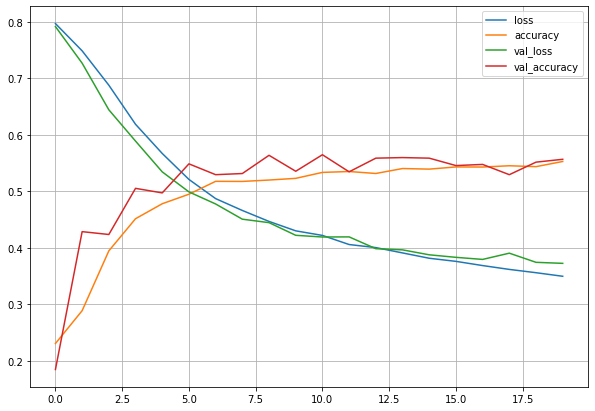

In [26]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [6]:
_input = keras.Input(shape=(300, 150, 1), name="img") #best so far
x = layers.Conv2D(128, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(0.1)(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=20)

print(max(history_all.history['accuracy']))

Epoch 1/20
 10/180 [>.............................] - ETA: 18:04 - loss: 0.8454 - accuracy: 0.4000

KeyboardInterrupt: ignored

In [1]:
history_test = model_all.evaluate(images[2], labels_all[2])

NameError: ignored

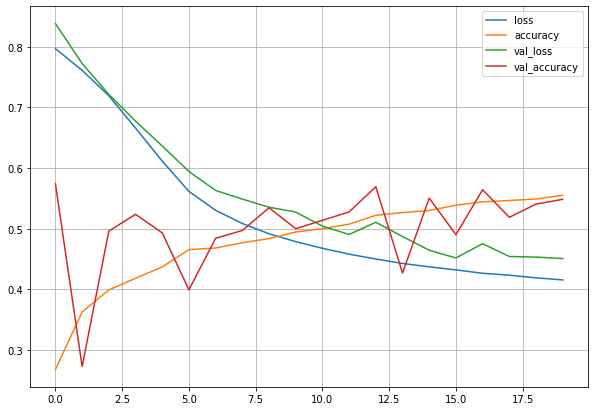

In [30]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)